In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image
from ipywidgets import widgets
from IPython.display import display
%matplotlib inline 

In [106]:
#Odabir slike
name = widgets.Text()
display(name)
display("Unesite naziv slike")

'Unesite naziv slike'

In [107]:
#Ucitavanje slike
img = Image.open(name.value)
img = np.array(img.convert('L'))
data = np.ravel(img).astype('float')
size = data.size

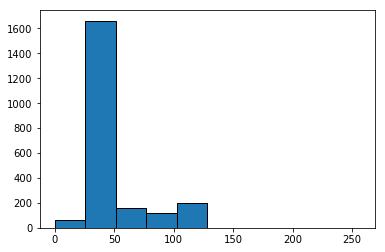

In [108]:
#Histogram
n, bins, b = plt.hist(data,range=[0,256], ec='k', bins=10)

In [109]:
#Odredjivanje broja segmenata k na osnovu histograma
k = widgets.IntText()
display('Unesite vrednost k')
display(k)

'Unesite vrednost k'

In [110]:
#incijalizacija parametara na osnovu histograma

In [111]:
k = k.value
index = np.argsort(-n)

In [112]:
bin_list = []
for i in range(k):
    b = []
    
    for x in data:
        if(bins[index[i]] < x and x < bins[index[i]+1]):
            b.append(x)

    bin_list.append(b)

In [113]:
mu = np.zeros(k)
sigma = np.zeros(k)
for i in range(k):
    mu[i] = np.array(bin_list[i]).mean()
    sigma[i] = np.std(np.array(bin_list[i]))

In [117]:
gaussians = n[index[:k]]
s = np.sum(gaussians)
p = gaussians/s

In [119]:
#parametri
print('p',p)
print('sigma',sigma)
print('mu',mu)

p [ 0.77845433  0.09180328  0.07494145  0.05480094]
sigma [ 2.53481766  2.66138803  5.94157755  7.89302241]
mu [  40.41275572  105.56122449   71.8125       95.53846154]
